# Deep Reinforcement Learning - Session 2 Exercise
## Markov Decision Processes and Value Functions

**Objective**: This comprehensive exercise covers fundamental concepts of reinforcement learning including Markov Decision Processes (MDPs), value functions, Bellman equations, and policy evaluation methods.

### Topics Covered:
1. Introduction to Reinforcement Learning Framework
2. Markov Decision Processes (MDPs)
3. Value Functions (State-Value and Action-Value)
4. Bellman Equations
5. Policy Evaluation and Improvement
6. Practical Implementation with GridWorld Environment

### Learning Outcomes:
By the end of this exercise, you will understand:
- The mathematical foundation of MDPs
- How to compute value functions
- The relationship between policies and value functions
- Implementation of basic RL algorithms

In [1]:
# Import all necessary modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List, Tuple, Optional
import pandas as pd
from collections import defaultdict
import random

# Import from our modular RL implementation
from environments import GridWorld, create_custom_environment
from policies import RandomPolicy, GreedyPolicy, CustomPolicy, GreedyActionPolicy, create_policy
from algorithms import (
    policy_evaluation, compute_q_from_v, compute_v_from_q,
    policy_iteration, value_iteration, q_learning
)
from visualization import (
    plot_value_function, plot_policy, plot_q_values,
    plot_learning_curve, compare_policies
)
from experiments import (
    experiment_discount_factors, experiment_policy_comparison,
    experiment_policy_iteration, experiment_value_iteration,
    experiment_q_learning, run_all_experiments
)

np.random.seed(42)
random.seed(42)

plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("Libraries and modules imported successfully!")
print("NumPy version:", np.__version__)

Libraries and modules imported successfully!
NumPy version: 2.2.6


## Part 1: Theoretical Foundation

### 1.1 Reinforcement Learning Framework

**Definition:**
Reinforcement Learning is a computational approach to learning from interaction. The key elements are:

-   **Agent**: The learner and decision maker - the entity that makes choices
-   **Environment**: The world the agent interacts with - everything outside the agent
-   **State (s)**: Current situation of the agent - describes the current circumstances
-   **Action (a)**: Choices available to the agent - decisions that can be made
-   **Reward (r)**: Numerical feedback from environment - immediate feedback signal
-   **Policy (π)**: Agent's strategy for choosing actions - mapping from states to actions

**Real-World Analogy:**
Think of RL like learning to drive:
-   **Agent** = The driver (you)
-   **Environment** = Roads, traffic, weather conditions
-   **State** = Current speed, position, traffic around you
-   **Actions** = Accelerate, brake, turn left/right
-   **Reward** = Positive for safe driving, negative for accidents
-   **Policy** = Your driving strategy (cautious, aggressive, etc.)

---

### 1.2 Markov Decision Process (MDP)

**Definition:**
An MDP is defined by the tuple (S, A, P, R, γ) where:

-   **S**: Set of states - all possible situations the agent can encounter
-   **A**: Set of actions - all possible decisions available to the agent
-   **P**: Transition probability function P(s'|s,a) - probability of moving to state s' given current state s and action a
-   **R**: Reward function R(s,a,s') - immediate reward received for transitioning from s to s' via action a
-   **γ**: Discount factor (0 ≤ γ ≤ 1) - determines importance of future rewards

**Markov Property:**
The future depends only on the current state, not on the history of how we got there. Mathematically:

P(S_{t+1} = s' | S_t = s, A_t = a, S_{t-1}, A_{t-1}, ..., S_0, A_0) = P(S_{t+1} = s' | S_t = s, A_t = a)

**Intuition:**
The current state contains all information needed to make optimal decisions. The past is already "encoded" in the current state.

---

### 1.3 Value Functions

**State-Value Function:**
$$V^π(s) = \mathbb{E}_π[G_t | S_t = s]$$

**Interpretation:** Expected total reward when starting from state s and following policy π. It answers: "How good is it to be in this state?"

**Action-Value Function:**
$$Q^π(s,a) = \mathbb{E}_π[G_t | S_t = s, A_t = a]$$

**Interpretation:** Expected total reward when taking action a in state s and then following policy π. It answers: "How good is it to take this specific action in this state?"

**Return (Cumulative Reward):**

GridWorld environment created!
States: 16
Actions: ['up', 'down', 'left', 'right']
Start state: (0, 0)
Goal state: (3, 3)
Obstacles: [(1, 1), (2, 1), (1, 2)]


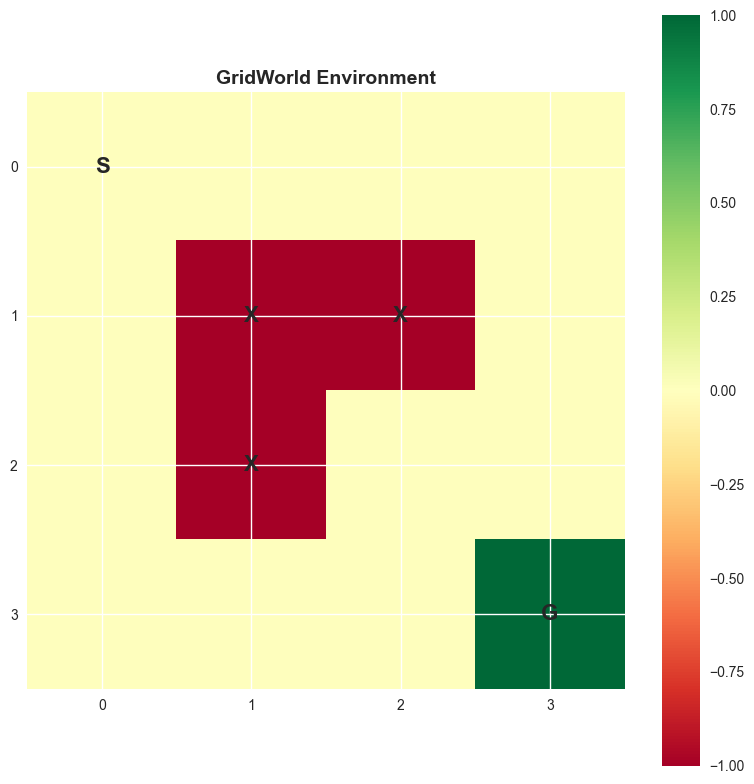

In [2]:
# Create and visualize the GridWorld environment
env = GridWorld()
print("GridWorld environment created!")
print(f"States: {len(env.states)}")
print(f"Actions: {env.actions}")
print(f"Start state: {env.start_state}")
print(f"Goal state: {env.goal_state}")
print(f"Obstacles: {env.obstacles}")

# Visualize the environment
env.visualize_grid(title="GridWorld Environment")

## Part 2: Policy Evaluation

### 2.1 Random Policy Evaluation

Let's start by evaluating a random policy in our GridWorld environment.

Evaluating Random Policy...
Policy evaluation converged after 39 iterations

Value function for random policy:
V((0, 0)) = -3.141
V((0, 1)) = -3.617
V((0, 2)) = -3.427
V((0, 3)) = -2.299
V((1, 0)) = -3.617
V((1, 3)) = -1.749
V((2, 0)) = -3.427
V((2, 2)) = -1.576
V((2, 3)) = 2.164
V((3, 0)) = -2.299
V((3, 1)) = -1.749
V((3, 2)) = 2.164


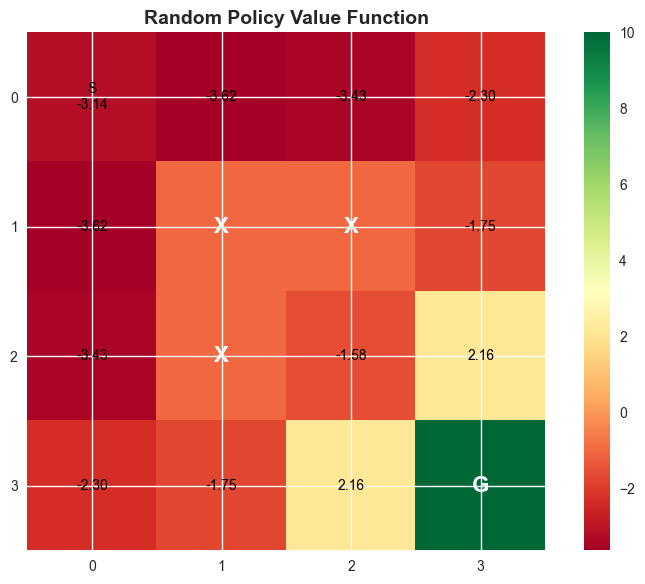

In [3]:
# Create a random policy
random_policy = RandomPolicy(env)

# Evaluate the random policy
print("Evaluating Random Policy...")
random_values = policy_evaluation(env, random_policy, gamma=0.9)

# Display results
print("\nValue function for random policy:")
for state in env.states:
    if state not in env.obstacles and state != env.goal_state:
        print(f"V({state}) = {random_values[state]:.3f}")

# Visualize the value function
plot_value_function(env, random_values, "Random Policy Value Function")

### 2.2 Custom Policy Evaluation

Now let's evaluate a custom policy that prefers moving right and down.

Evaluating Custom Policy...
Policy evaluation converged after 111 iterations

Value function for custom policy:
V((0, 0)) = -1.000
V((0, 1)) = -1.000
V((0, 2)) = -1.000
V((0, 3)) = -1.000
V((1, 0)) = -5.000
V((1, 3)) = -1.000
V((2, 0)) = -5.000
V((2, 2)) = -1.000
V((2, 3)) = -1.000
V((3, 0)) = 7.910
V((3, 1)) = 8.900
V((3, 2)) = 10.000


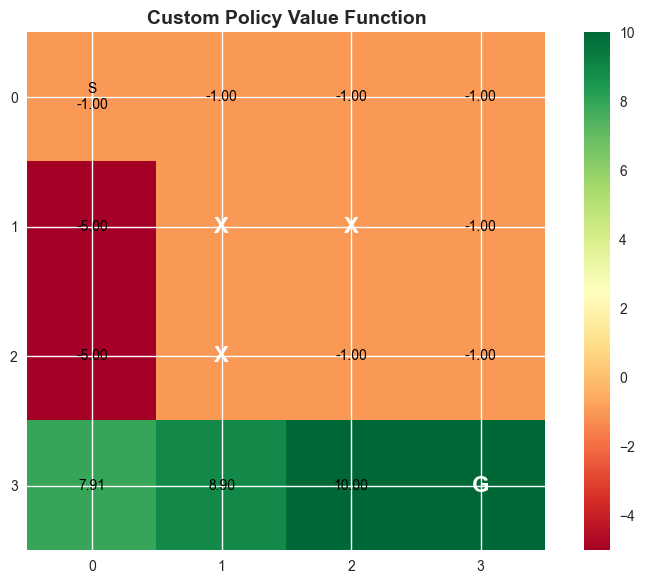

In [4]:
# Create a custom policy
custom_policy = CustomPolicy(env)

# Evaluate the custom policy
print("Evaluating Custom Policy...")
custom_values = policy_evaluation(env, custom_policy, gamma=0.9)

# Display results
print("\nValue function for custom policy:")
for state in env.states:
    if state not in env.obstacles and state != env.goal_state:
        print(f"V({state}) = {custom_values[state]:.3f}")

# Visualize the value function
plot_value_function(env, custom_values, "Custom Policy Value Function")

### 2.3 Policy Comparison

Let's compare different policies side by side.

=== Experiment: Policy Comparison ===
Policy evaluation converged after 111 iterations
Policy evaluation converged after 39 iterations
Policy evaluation converged after 111 iterations
Policy evaluation converged after 111 iterations


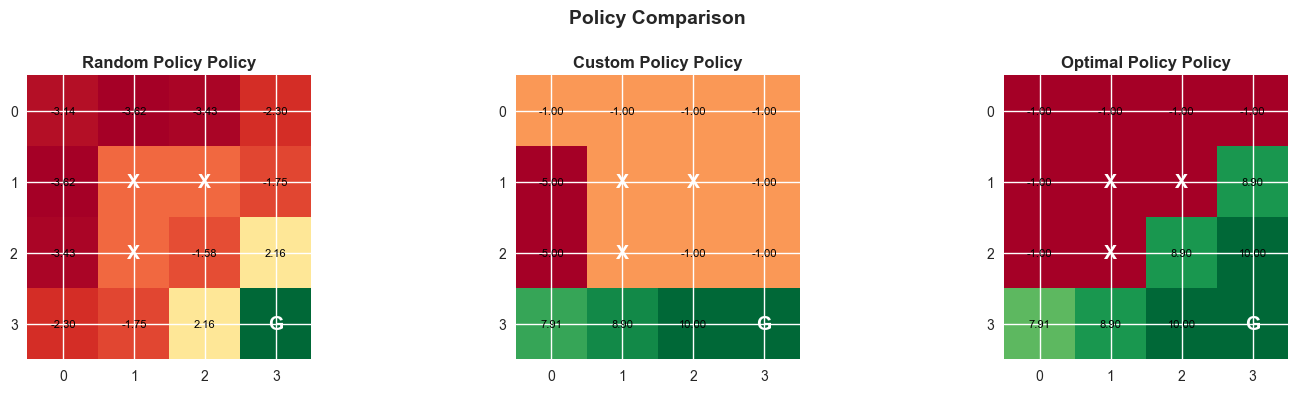

Policy evaluation converged after 39 iterations
Random Policy: Start state value = -3.141
Policy evaluation converged after 111 iterations
Custom Policy: Start state value = -1.000
Policy evaluation converged after 111 iterations
Optimal Policy: Start state value = -1.000


In [5]:
# Run policy comparison experiment
experiment_policy_comparison(env, gamma=0.9)

## Part 3: Q-Value Functions

### 3.1 Computing Q-Values from V-Values

Let's compute Q-values from the value function of our custom policy.

Q-values computed from V-values:

State (0, 0):
  Q((0, 0), up) = -1.000
  Q((0, 0), down) = -4.600
  Q((0, 0), left) = -1.000
  Q((0, 0), right) = -1.000

State (1, 0):
  Q((1, 0), up) = -1.000
  Q((1, 0), down) = -4.600
  Q((1, 0), left) = -4.600
  Q((1, 0), right) = -5.000

State (2, 2):
  Q((2, 2), up) = -5.000
  Q((2, 2), down) = 8.900
  Q((2, 2), left) = -5.000
  Q((2, 2), right) = -1.000


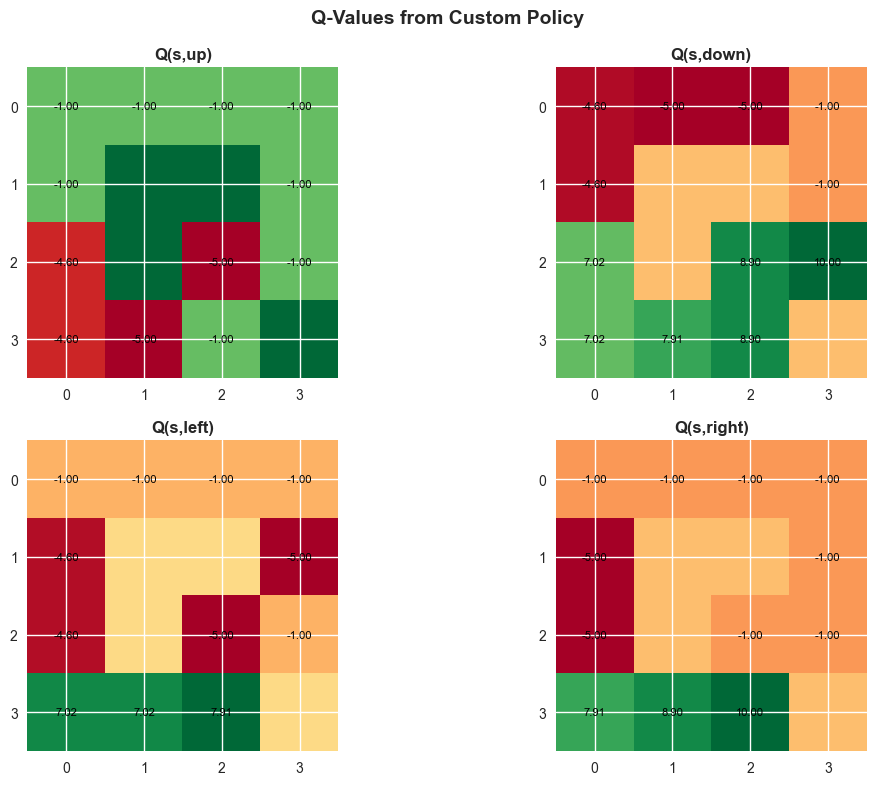

In [6]:
# Compute Q-values from V-values
Q_from_V = compute_q_from_v(env, custom_values, gamma=0.9)

print("Q-values computed from V-values:")
for state in [(0,0), (1,0), (2,2)]:  # Show some key states
    print(f"\nState {state}:")
    for action in env.get_valid_actions(state):
        print(f"  Q({state}, {action}) = {Q_from_V[(state, action)]:.3f}")

# Visualize Q-values
plot_q_values(env, Q_from_V, "Q-Values from Custom Policy")

### 3.2 Computing V-Values from Q-Values

Now let's do the reverse - compute V-values from Q-values.

In [7]:
# Compute V-values from Q-values
V_from_Q = compute_v_from_q(Q_from_V, env)

print("V-values computed from Q-values:")
for state in env.states:
    if state not in env.obstacles and state != env.goal_state:
        print(f"V({state}) = {V_from_Q[state]:.3f}")

# Compare with original V-values
print("\nComparison with original V-values:")
for state in env.states:
    if state not in env.obstacles and state != env.goal_state:
        original = custom_values[state]
        computed = V_from_Q[state]
        diff = abs(original - computed)
        print(f"State {state}: Original={original:.3f}, Computed={computed:.3f}, Diff={diff:.6f}")

V-values computed from Q-values:
V((0, 0)) = -1.000
V((0, 1)) = -1.000
V((0, 2)) = -1.000
V((0, 3)) = -1.000
V((1, 0)) = -1.000
V((1, 3)) = -1.000
V((2, 0)) = 7.019
V((2, 2)) = 8.900
V((2, 3)) = 10.000
V((3, 0)) = 7.910
V((3, 1)) = 8.900
V((3, 2)) = 10.000

Comparison with original V-values:
State (0, 0): Original=-1.000, Computed=-1.000, Diff=0.000001
State (0, 1): Original=-1.000, Computed=-1.000, Diff=0.000001
State (0, 2): Original=-1.000, Computed=-1.000, Diff=0.000001
State (0, 3): Original=-1.000, Computed=-1.000, Diff=0.000001
State (1, 0): Original=-5.000, Computed=-1.000, Diff=4.000008
State (1, 3): Original=-1.000, Computed=-1.000, Diff=0.000001
State (2, 0): Original=-5.000, Computed=7.019, Diff=12.019000
State (2, 2): Original=-1.000, Computed=8.900, Diff=9.899992
State (2, 3): Original=-1.000, Computed=10.000, Diff=10.999992
State (3, 0): Original=7.910, Computed=7.910, Diff=0.000000
State (3, 1): Original=8.900, Computed=8.900, Diff=0.000000
State (3, 2): Original=10.000

## Part 4: Policy Iteration

### 4.1 Running Policy Iteration

Let's run the policy iteration algorithm to find the optimal policy.

=== Experiment: Policy Iteration ===
Policy Iteration - Iteration 1
Policy evaluation converged after 39 iterations
Policy Iteration - Iteration 2
Policy evaluation converged after 111 iterations
Policy Iteration - Iteration 3
Policy evaluation converged after 111 iterations
Policy Iteration - Iteration 4
Policy evaluation converged after 7 iterations
Policy iteration converged after 4 iterations

Policy iteration completed in 4 iterations
Final value of start state: 5.495


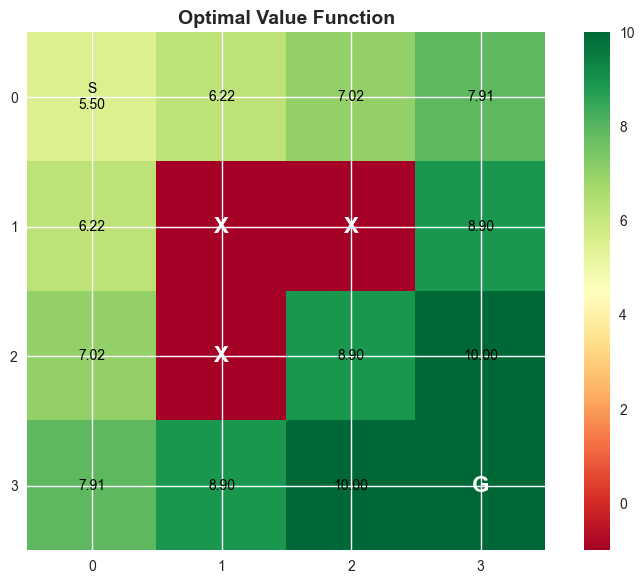

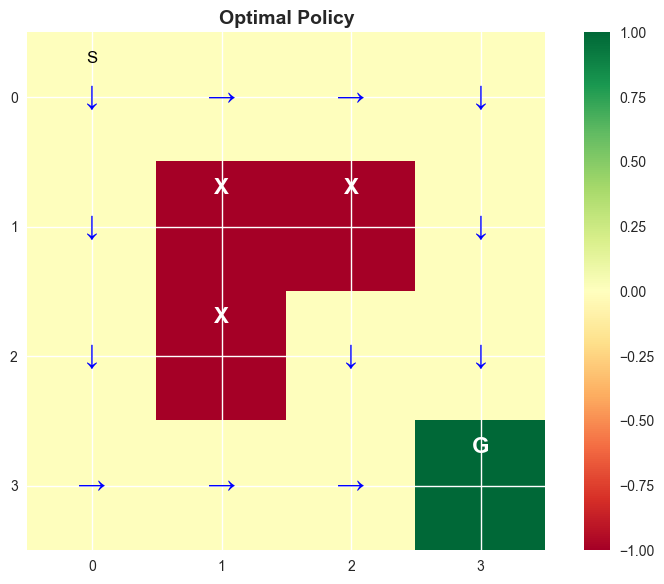


Policy iteration completed in 4 iterations
Final value of start state: 5.495


In [8]:
# Run policy iteration
optimal_policy, optimal_values, iteration_history = experiment_policy_iteration(env, gamma=0.9)

print(f"\nPolicy iteration completed in {len(iteration_history)} iterations")
print(f"Final value of start state: {optimal_values[(0,0)]:.3f}")

## Part 5: Value Iteration

### 5.1 Running Value Iteration

Now let's run value iteration to find the optimal value function.

=== Experiment: Value Iteration ===
Value iteration converged after 7 iterations

Value iteration completed in 7 iterations
Final value of start state: 5.495


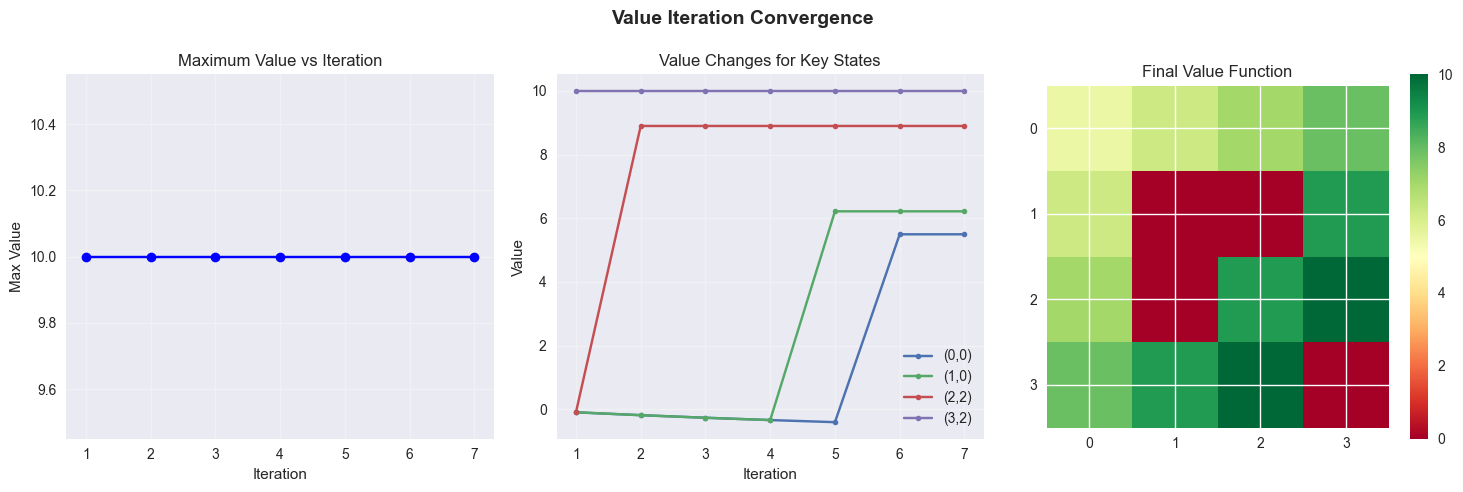

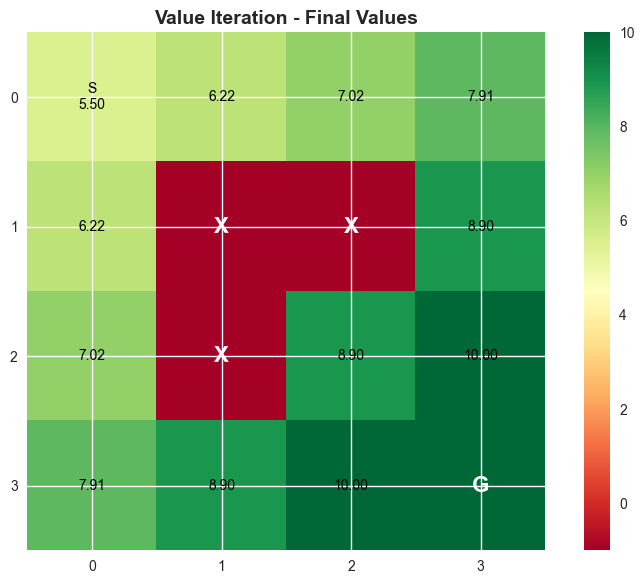

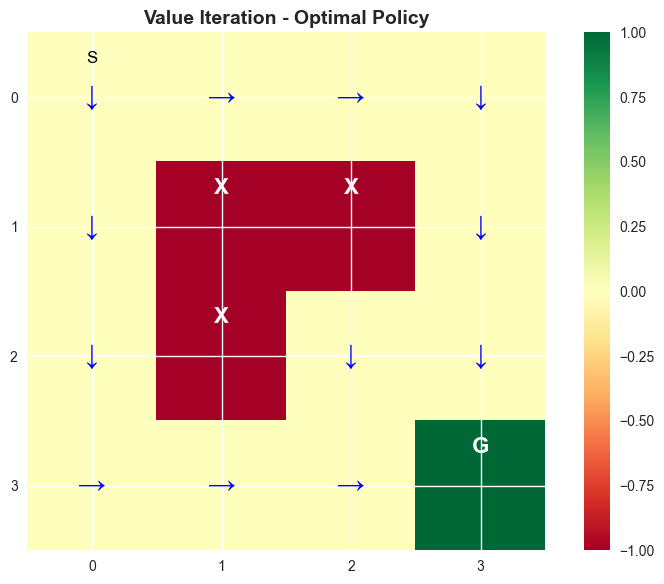


Value iteration completed in 7 iterations
Final value of start state: 5.495


In [9]:
# Run value iteration
optimal_values_vi, optimal_policy_vi, history_vi = experiment_value_iteration(env, gamma=0.9)

print(f"\nValue iteration completed in {len(history_vi)} iterations")
print(f"Final value of start state: {optimal_values_vi[(0,0)]:.3f}")

## Part 6: Q-Learning

### 6.1 Running Q-Learning

Let's train an agent using Q-learning.

In [10]:
# Run Q-learning experiment
Q_learned, values_learned, policy_learned, rewards_history = experiment_q_learning(
    env, num_episodes=1000, alpha=0.1, gamma=0.9, epsilon=0.1
)

print(f"\nQ-learning completed!")
print(f"Final value of start state: {values_learned[(0,0)]:.3f}")

=== Experiment: Q-Learning ===


ValueError: max() iterable argument is empty

## Part 7: Effect of Discount Factor

### 7.1 Discount Factor Experiments

Let's see how different discount factors affect the value function.

=== Experiment: Effect of Discount Factor ===

Evaluating policy with gamma = 0.1
Policy evaluation converged after 7 iterations
Value of start state (0,0): -0.179
Value of state near goal (2,2): -2.430

Evaluating policy with gamma = 0.5
Policy evaluation converged after 15 iterations
Value of start state (0,0): -0.764
Value of state near goal (2,2): -1.973

Evaluating policy with gamma = 0.9
Policy evaluation converged after 39 iterations
Value of start state (0,0): -3.141
Value of state near goal (2,2): -1.576

Evaluating policy with gamma = 0.99
Policy evaluation converged after 58 iterations
Value of start state (0,0): -4.997
Value of state near goal (2,2): -1.585


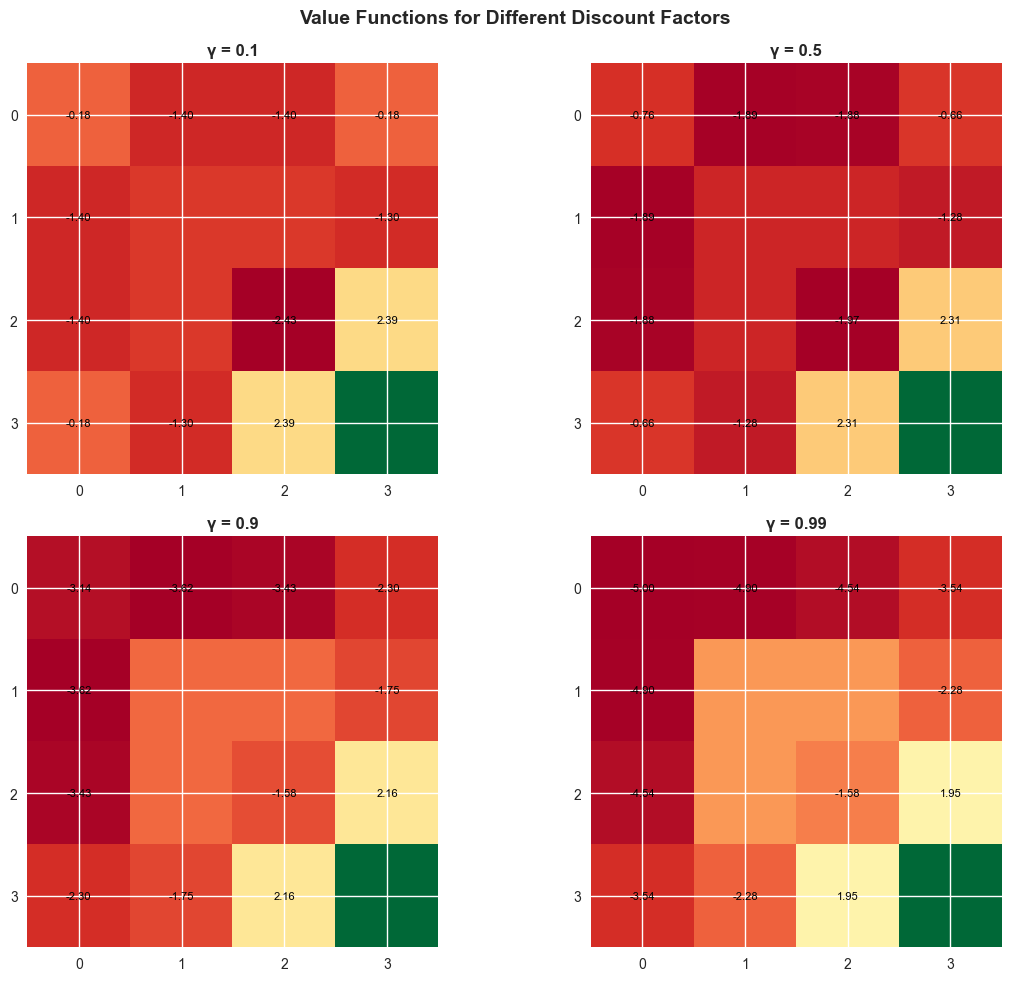

{0.1: defaultdict(float,
             {(0, 0): -0.17891807401838528,
              (1, 0): -1.399443527145084,
              (0, 1): -1.3994435271450842,
              (1, 1): 0.0,
              (0, 2): -1.3993794942903994,
              (1, 2): 0.0,
              (0, 3): -0.17635673836452403,
              (1, 3): -1.3021765390928044,
              (2, 0): -1.3993794942903992,
              (2, 3): 2.3914717191210992,
              (3, 0): -0.17635673836452403,
              (2, 1): 0.0,
              (2, 2): -2.4304264140982488,
              (3, 2): 2.3914717191210992,
              (3, 3): 0.0,
              (3, 1): -1.3021765390928044}),
 0.5: defaultdict(float,
             {(0, 0): -0.7639386989538708,
              (1, 0): -1.8918165579473054,
              (0, 1): -1.8918165579473054,
              (1, 1): 0.0,
              (0, 2): -1.8787773450183005,
              (1, 2): 0.0,
              (0, 3): -0.6596249269995034,
              (1, 3): -1.27897228535229,
              

In [11]:
experiment_discount_factors(env, random_policy, gamma_values=[0.1, 0.5, 0.9, 0.99])

## Part 8: Environment Modifications

### 8.1 Testing Different Environments

Let's test how the optimal policy changes with different obstacle configurations.

In [12]:
experiment_environment_modifications()

NameError: name 'experiment_environment_modifications' is not defined

## Part 9: Summary and Conclusions

### 9.1 Key Takeaways

In this exercise, we have:

1. **Implemented a complete GridWorld environment** with customizable rewards and obstacles
2. **Created various policy classes** including random, greedy, and custom policies
3. **Implemented core RL algorithms** including policy evaluation, policy iteration, value iteration, and Q-learning
4. **Built comprehensive visualization tools** for value functions, policies, and learning curves
5. **Conducted systematic experiments** to understand the effects of different parameters

### 9.2 What We Learned

- **Value functions** quantify how good it is to be in a particular state or take a particular action
- **Policy evaluation** computes the value function for a given policy
- **Policy improvement** finds better policies given value functions
- **Policy iteration** alternates between evaluation and improvement to find optimal policies
- **Value iteration** directly computes optimal value functions
- **Q-learning** can learn optimal policies through interaction with the environment
- **Discount factors** control the importance of future rewards
- **Environment design** significantly affects the difficulty and optimal strategies

### 9.3 Next Steps

This foundation prepares us for more advanced RL topics including:
- Function approximation for large state spaces
- Deep reinforcement learning with neural networks
- Multi-agent reinforcement learning
- Real-world applications and challenges